# **Ejercicio 3 (minimización con restricciones no lineales)**

**Objetivo:** Minimizar la suma de las distancias euclidianas desde un punto (x, y) a tres puntos fijos, sujeto a restricciones no lineales, utilizando algoritmos genéticos con DEAP.

## **Configuración Inicial**

Se importa la librería DEAP y otros paquetes necesarios. Si DEAP no está instalado, se debe descomentar y ejecutar la línea de instalación.

In [1]:
# https://deap.readthedocs.io/en/master/
# Instalar el paquete DEAP
# !pip install deap

In [ ]:
# Importar paquetes
import numpy as np
import random
import math
from deap import creator, tools, base, algorithms
import matplotlib.pyplot as plt

## **Planteamiento del Problema**

Se busca encontrar un punto $(x, y)$ que minimice la suma de sus distancias a tres centros $C_i$ dados.

**Centros:**
* $C_1 = (-5, 10)$
* $C_2 = (2, 1)$
* $C_3 = (10, 5)$

**Función Objetivo:**

$$ \text{Minimizar } Z = \sum_{i=1}^{3} \sqrt{(x_{C_i} - x)^2 + (y_{C_i} - y)^2} $$

**Restricciones no lineales:**
La distancia desde el punto solución $(x, y)$ a cada centro $C_i$ no debe ser mayor a 10.

$$ \sqrt{(x_{C_1} - x)^2 + (y_{C_1} - y)^2} \leq 10 $$
$$ \sqrt{(x_{C_2} - x)^2 + (y_{C_2} - y)^2} \leq 10 $$
$$ \sqrt{(x_{C_3} - x)^2 + (y_{C_3} - y)^2} \leq 10 $$

## **Funciones de Evaluación, Factibilidad y Penalización**

* **Función Objetivo:** Calcula el valor de la función Z (suma de distancias) que se desea minimizar.
* **Función de Factibilidad:** Verifica si una solución (individuo) cumple con las tres restricciones de distancia.
* **Función de Penalización:** Calcula una penalización para las soluciones que no son factibles.

In [3]:
# Función Objetivo (F.O.)
# El individuo es una lista [x, y].
# La función calcula la suma de las distancias euclidianas a los 3 centros.
def objective_function(individual):
    FO = 0
    Pos_c = ([-5, 10], [2, 1], [10, 5])

    for x, y in Pos_c:
        FO += math.sqrt((x - individual[0])**2 + (y - individual[1])**2)

    return FO,

# Límites de las soluciones factibles (función de factibilidad)
# Devuelve True si el individuo cumple todas las restricciones, False en caso contrario.
def feasible(individual):
    Pos_c = ([-5, 10], [2, 1], [10, 5])

    if math.sqrt((Pos_c[0][0] - individual[0])**2 + (Pos_c[0][1] - individual[1])**2) > 10:
        return False
    if math.sqrt((Pos_c[1][0] - individual[0])**2 + (Pos_c[1][1] - individual[1])**2) > 10:
        return False
    if math.sqrt((Pos_c[2][0] - individual[0])**2 + (Pos_c[2][1] - individual[1])**2) > 10:
        return False
    else:
        return True

# Penalización para individuos inválidos
# Calcula la suma de las violaciones de las restricciones.
def distance(individual):
    Pos_c = ([-5, 10], [2, 1], [10, 5])

    constraint1 = abs(math.sqrt((Pos_c[0][0] - individual[0])**2 + (Pos_c[0][1] - individual[1])**2) - 10)
    constraint2 = abs(math.sqrt((Pos_c[1][0] - individual[0])**2 + (Pos_c[1][1] - individual[1])**2) - 10)
    constraint3 = abs(math.sqrt((Pos_c[2][0] - individual[0])**2 + (Pos_c[2][1] - individual[1])**2) - 10)

    return (constraint1 + constraint2 + constraint3)

In [4]:
# Prueba de la función objetivo
objective_function([0, 0])

(24.596747752497688,)

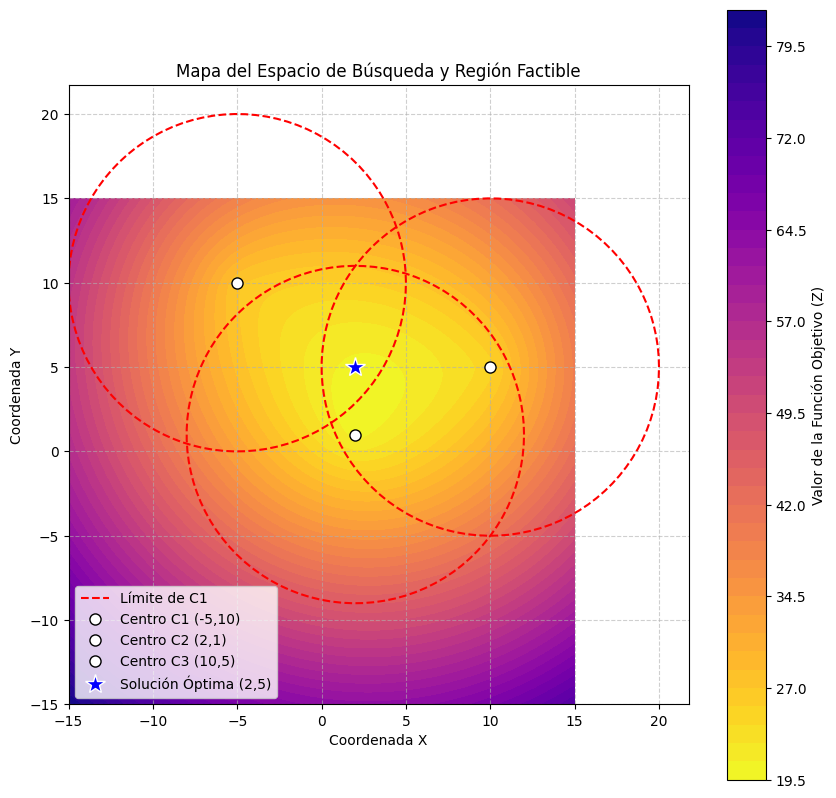

In [ ]:
# Visualización del Espacio de Búsqueda y la Solución Óptima
# Este código crea un mapa visual del problema para entender mejor la solución.

# Coordenadas de los tres centros fijos del problema.
centros = {
    'C1': (-5, 10),
    'C2': (2, 1),
    'C3': (10, 5)
}

# Ejemplo del valor obtenido: hof[0]
solucion_optima = [2, 5]

# Creación del Mapa del Espacio de Búsqueda
# Definir la malla (grid) para el espacio de búsqueda.
x_range = np.linspace(-15, 15, 400)
y_range = np.linspace(-15, 15, 400)
X, Y = np.meshgrid(x_range, y_range)

# Calcular el valor de la función objetivo (Z) para cada punto de la malla.
# Z es la suma de las distancias euclidianas a los tres centros.
Z = np.zeros_like(X)
for cx, cy in centros.values():
    distancia = np.sqrt((X - cx)**2 + (Y - cy)**2)
    Z += distancia

# Generación del Gráfico
plt.figure(figsize=(10, 10))

# Dibujar el mapa de contorno de la función objetivo.
# 'contourf' crea un mapa de calor. 'levels=50' da más detalle a los contornos.
# 'cmap='plasma_r'' usa un mapa de color donde los valores más bajos son más oscuros.
contour = plt.contourf(X, Y, Z, levels=50, cmap='plasma_r')
plt.colorbar(contour, label='Valor de la Función Objetivo (Z)')

# Dibujar los círculos que representan las restricciones.
# La solución debe estar dentro de un círculo de radio 10 para cada centro.
theta = np.linspace(0, 2 * np.pi, 100)
radio = 10

for nombre, (cx, cy) in centros.items():
    x_circulo = cx + radio * np.cos(theta)
    y_circulo = cy + radio * np.sin(theta)
    plt.plot(x_circulo, y_circulo, 'r--', linewidth=1.5, label=f'Límite de {nombre}' if nombre == 'C1' else "")


# Dibujar los puntos clave (Centros)
for nombre, (cx, cy) in centros.items():
    plt.plot(cx, cy, 'wo', markersize=8, markeredgecolor='black', label=f'Centro {nombre} ({cx},{cy})')

# Solución Óptima
plt.plot(solucion_optima[0], solucion_optima[1], 'b*', markersize=15, markeredgecolor='white', label=f'Solución ({solucion_optima[0]},{solucion_optima[1]})')

# Configuración Final del Gráfico
plt.title('Mapa del Espacio de Búsqueda y Región Factible')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
# Asegurar que la escala de los ejes sea la misma para que los círculos no se vean como elipses.
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## **Configuración del Algoritmo Genético con DEAP**

### **1. Creación de Tipos**
* **FitnessMin:** Se crea el objeto `Fitness` para minimización. El `weights=(-1.0,)` indica que el objetivo es minimizar el valor devuelto por la función objetivo.
* **Individual:** Un individuo será una lista de Python con el `FitnessMin` asociado.

In [6]:
# Creación de los tipos de Fitness e Individuo
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [7]:
# Crear la caja de herramientas (Toolbox)
toolbox = base.Toolbox()

# Generador de atributos enteros: los genes de los individuos (coordenadas x, y).
# Se generarán enteros aleatorios en el intervalo [-15, 15].
toolbox.register("attr_int", random.randint, -15, 15)

# Inicializador de individuo y población
# Un individuo consta de 2 genes (variables de decisión: x e y).
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2)
# La población es una lista de individuos.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
# Operación de mutación personalizada
# Aplica una pequeña variación gaussiana a un gen aleatorio del individuo.
def mutation_gaussian_int(individual, indp=0.5):
    size = int(len(individual))
    gene_idx = random.randint(0, size-1)
    mu = individual[gene_idx]
    if random.random() < indp:
        rnd = random.gauss(0, 1)
        individual[gene_idx] += int(rnd)
    return individual,

In [9]:
# Registro de Operadores Genéticos en la Toolbox
import sys

# Evaluate: registra la función objetivo y la decora con la penalización.
toolbox.register('evaluate', objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))

# Mate: cruce de un punto.
toolbox.register('mate', tools.cxOnePoint)

# Mutate: mutación personalizada.
toolbox.register('mutate', mutation_gaussian_int, indp=0.7)

# Select: selección por torneo.
toolbox.register('select', tools.selTournament, tournsize=3)

In [10]:
# Creación de la población inicial y configuración de estadísticas
pop = toolbox.population(n=100)

# hof (HallOfFame) almacena el mejor individuo encontrado.
hof = tools.HallOfFame(1)

# Stats registra las estadísticas de la población en cada generación.
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

## **Optimización**

Se ejecuta el algoritmo genético con los operadores y parámetros definidos.

In [11]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.4, ngen=100,
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max  
0  	100   	20.2573	9.78908	3.37564	48.66
1  	73    	12.7139	4.49957	2.65737	27.0711
2  	70    	10.9315	4.42933	2.65737	27.0711
3  	78    	10.6651	5.57101	2.65737	27.0711
4  	78    	7.96844	4.21096	2.65737	22.8241
5  	65    	5.73587	4.41744	2.65737	27.0711
6  	71    	3.68776	2.63171	2.65737	27.0711
7  	76    	3.47346	3.97631	2.65737	26.0298
8  	77    	2.93662	2.33096	2.65737	26.0298
9  	69    	3.58172	4.50673	2.65737	26.0298
10 	75    	3.11487	3.16709	2.65737	26.0298
11 	82    	2.91257	2.33145	2.65737	26.0298
12 	78    	3.13258	3.17043	2.65737	26.0298
13 	74    	2.91415	2.3313 	2.65737	26.0298
14 	72    	3.16903	3.27718	2.65737	26.0298
15 	74    	3.393  	4.04757	2.65737	27.0711
16 	69    	2.89288	2.32538	2.65737	26.0298
17 	78    	3.60832	4.56026	2.65737	27.0711
18 	79    	2.68165	0.211884	2.65737	4.78377
19 	85    	3.83907	5.13955 	2.65737	27.0711
20 	79    	3.11818	3.16667 	2.65737	26.0298
21 	79    	2.67902	0.194026	2.65737	4.60459
22 	84    	

## **Resultados**

Se muestran los resultados finales del proceso de optimización.

In [12]:
# Mejor solución encontrada
print('Mejor individuo:', hof[0])

Mejor individuo: [4, 11]


In [13]:
# Valor de la Función Objetivo para el mejor individuo:
print('Mejor F.O.:', objective_function(hof[0]))

Mejor F.O.: (27.738705539561558,)


In [14]:
# Verificar si el mejor individuo cumple con las restricciones
print('Cumple restricciones:', feasible(hof[0]))

Cumple restricciones: False


## **Análisis Gráfico**

Se visualizan los resultados. El gráfico muestra:
* Los tres centros fijos (en rojo).
* El punto óptimo encontrado por el algoritmo (en azul).
* La región factible, que corresponde a la intersección de los tres círculos con radio 10 centrados en los puntos fijos. El círculo dibujado está centrado en la solución óptima para mostrar que está dentro de la región factible.

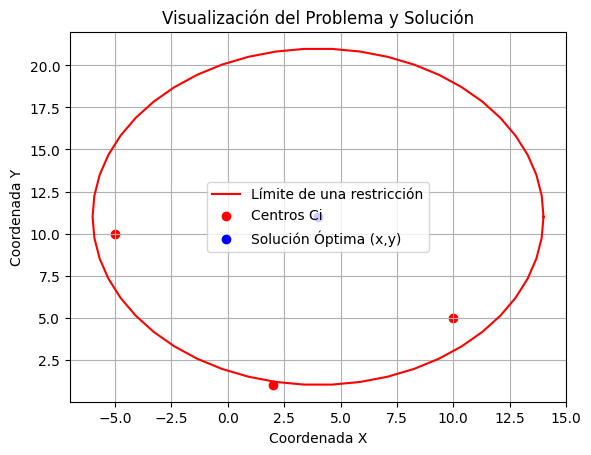

In [15]:
import matplotlib.pyplot as plt

# Coordenadas de los centros
x_c = [-5, 2, 10]
y_c = [10, 1, 5]

# Posición de la antena (solución óptima)
Pos_Ant = hof[0]

# Dibujar el círculo de la restricción centrado en la solución
num_segmentos = 50
rad = 10
cx = Pos_Ant[0]
cy = Pos_Ant[1]

angulo = np.linspace(0, 2*np.pi, num_segmentos+1)
x = rad * np.cos(angulo) + cx
y = rad * np.sin(angulo) + cy

# Graficar
plt.plot(x, y, color="red", markersize=1, label='Límite de una restricción')
plt.scatter(x_c, y_c, color='red', label='Centros Ci')
plt.scatter(Pos_Ant[0], Pos_Ant[1], color='blue', label='Solución Óptima (x,y)')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Visualización del Problema y Solución')
plt.legend()
plt.grid()
plt.show()